<H2>CODE Cumbria Data Science Project
<H1> Simon McCall (Cohort 2)

# About Data
This dataset is a refined version of the original Cyber Security Attacks dataset, the raw data having been published as Open Source by the Government of Canada. The Dataset comprises 40,000 rows, 34 columns, and can be found [here](https://www.kaggle.com/datasets/saadatkhalid/cyber-security-attacks-cleaned/data). 

<ins>Load Packages</ins>

In [1]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import IsolationForest

<ins>Load Dataset</ins>

In [4]:
CyberSecurity_df = pd.read_csv('Datasets/updated_cybersecurity_attacks.csv', sep=',')

In [15]:
CyberSecurity_df.head()
CyberSecurity_df.info()
CyberSecurity_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40000 entries, 0 to 39999
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              40000 non-null  int64  
 1   Timestamp               40000 non-null  object 
 2   Source IP Address       40000 non-null  object 
 3   Destination IP Address  40000 non-null  object 
 4   Source Port             40000 non-null  int64  
 5   Destination Port        40000 non-null  int64  
 6   Protocol                40000 non-null  object 
 7   Packet Length           40000 non-null  int64  
 8   Packet Type             40000 non-null  object 
 9   Traffic Type            40000 non-null  object 
 10  Payload Data            40000 non-null  object 
 11  Malware Indicators      40000 non-null  object 
 12  Anomaly Scores          40000 non-null  float64
 13  Alerts/Warnings         40000 non-null  object 
 14  Attack Type             40000 non-null

,Unnamed: 0,Source Port,Destination Port,Packet Length,Anomaly Scores,Year,Month,Day,Hour,Minute,Second,DayOfWeek
count,40000.00000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000,40000.000000
mean,19999.50000,32970.356450,33150.868650,781.452725,50.113473,2021.411375,6.288275,15.629550,11.507350,29.511825,29.591300,2.995750
std,11547.14972,18560.425604,18574.668842,416.044192,28.853598,1.085253,3.332979,8.771715,6.919122,17.360543,17.357387,2.004515
min,0.00000,1027.000000,1024.000000,64.000000,0.000000,2020.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,9999.75000,16850.750000,17094.750000,420.000000,25.150000,2020.000000,3.000000,8.000000,5.000000,14.000000,14.000000,1.000000
50%,19999.50000,32856.000000,33004.500000,782.000000,50.345000,2021.000000,6.000000,16.000000,12.000000,29.000000,30.000000,3.000000
75%,29999.25000,48928.250000,49287.000000,1143.000000,75.030000,2022.000000,9.000000,23.000000,17.000000,45.000000,45.000000,5.000000
max,39999.00000,65530.000000,65535.000000,1500.000000,100.000000,2023.000000,12.000000,31.000000,23.000000,59.000000,59.000000,6.000000


# Initial Analysis of Data

<ins>Incidence by Attack Type</ins>

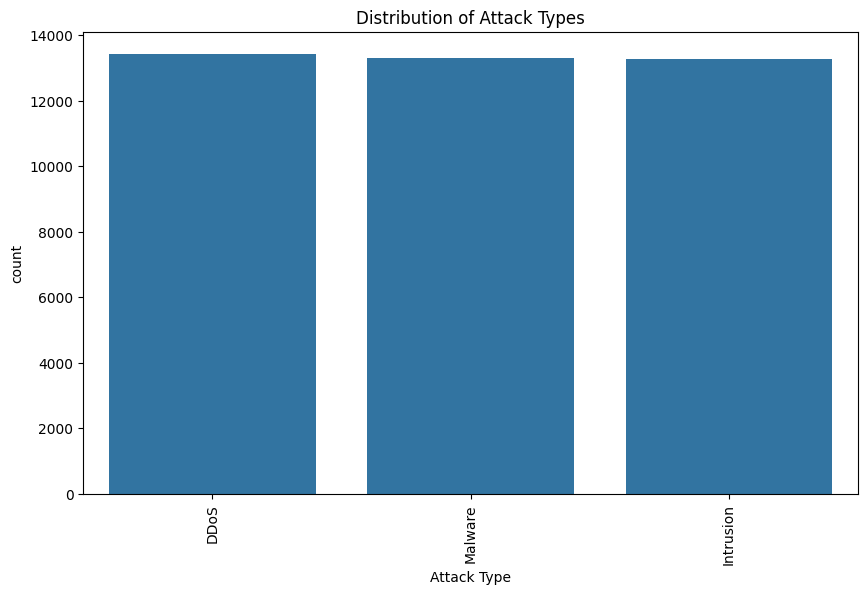

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(data=CyberSecurity_df, x='Attack Type', order=CyberSecurity_df['Attack Type'].value_counts().index)
plt.xticks(rotation=90)
plt.title('Distribution of Attack Types')
plt.show()

<ins>Overall Incidence Trend</ins>

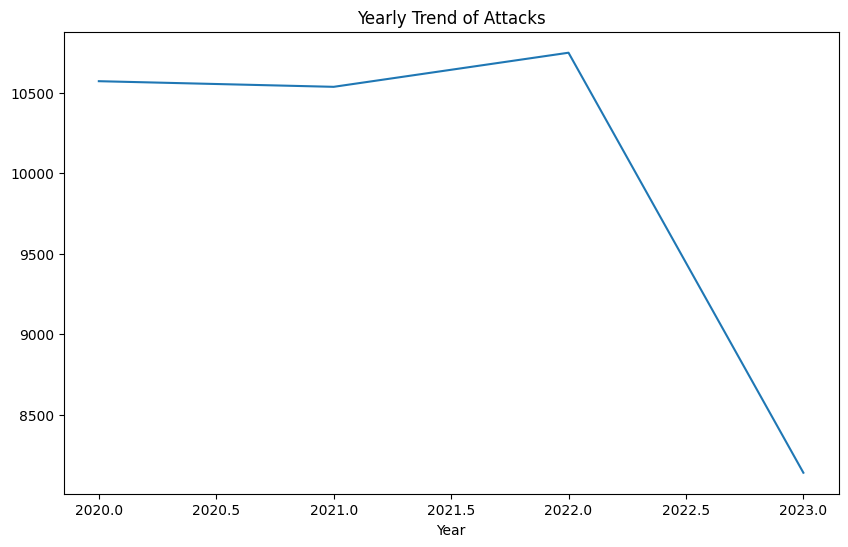

In [20]:
CyberSecurity_df['Year'] = pd.to_datetime(CyberSecurity_df['Timestamp']).dt.year
yearly_trend = CyberSecurity_df['Year'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values)
plt.title('Yearly Trend of Attacks')
plt.show()

<ins>Incidence by Month</ins>

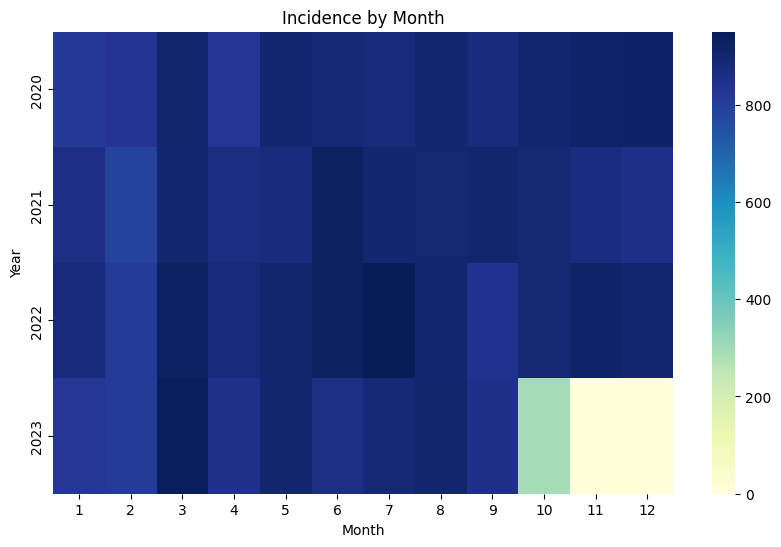

In [22]:
CyberSecurity_df['Month'] = pd.to_datetime(CyberSecurity_df['Timestamp']).dt.month
monthly_trend = CyberSecurity_df.groupby(['Year', 'Month']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(monthly_trend, cmap='YlGnBu')
plt.title('Incidence by Month')
plt.show()

<ins>Incidence by Time of Attack</ins>

In [5]:
CyberSecurity_df['Timestamp'] = pd.to_datetime(CyberSecurity_df['Timestamp'])

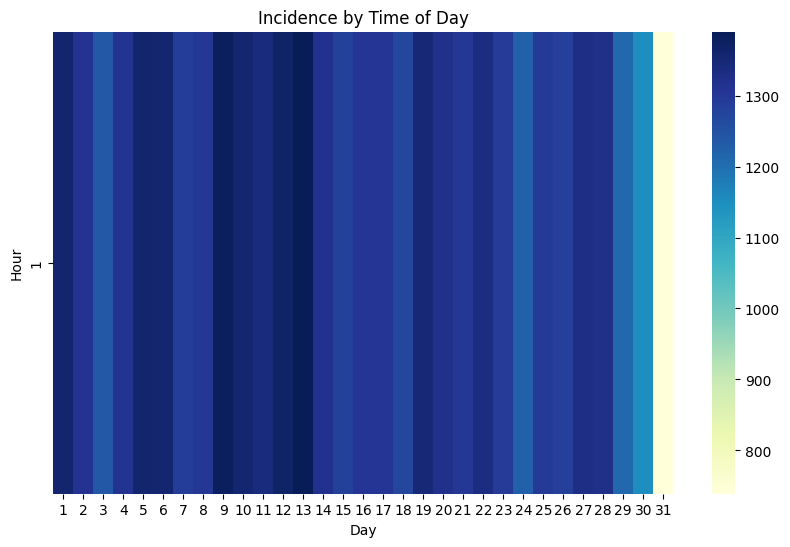

In [6]:
CyberSecurity_df['Hour'] = pd.to_datetime(CyberSecurity_df['Day']).dt.day
hourly_trend = CyberSecurity_df.groupby(['Hour', 'Day']).size().unstack(fill_value=0)
plt.figure(figsize=(10,6))
sns.heatmap(hourly_trend, cmap='YlGnBu')
plt.title('Incidence by Time of Day')
plt.show()

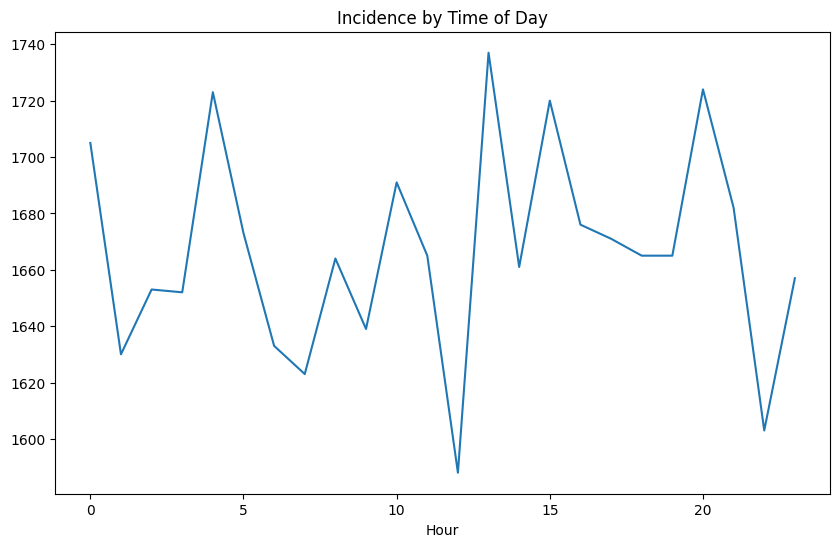

In [10]:
CyberSecurity_df['Hour'] = pd.to_datetime(CyberSecurity_df['Timestamp']).dt.hour
hourly_trend = CyberSecurity_df['Hour'].value_counts().sort_index()
plt.figure(figsize=(10,6))
sns.lineplot(x=hourly_trend.index, y=hourly_trend.values)
plt.title('Incidence by Time of Day')
plt.show()

<h3>Sources of Attack</h3>

<ins>Source IP Geolocation</ins>

In [56]:
!pip install ipython

In [67]:
import IPython

url = 'https://www.google.com/maps/d/view?mid=12462TYF6qW7CZ4joLYtyL4xyIiuNLsQ&usp=sharing'
iframe = '<iframe src=' + url + ' width=700 height=350></iframe>'
IPython.display.HTML(iframe)